(900, 1349, 3)
Aspect ratio = 1.498888888888889
w = 3.7472222222222222, h = 2.5


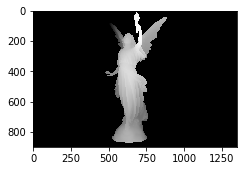

In [1]:
#!/usr/bin/env python
"""

.. module:: Solver
   :synopsis: Constructs a Mesh from a DepthBuffer and a MeshTransform.

.. moduleauthor:: Steve Knipmeyer <steve@modelrelief.org>

"""
import os.path
import matplotlib.pylab as plt


def plot_image(image, height=8, **kwargs):
    """
    Helper function to plot an image.
    Dimensions are in inches.
    """
    
    y_length = image.shape[0]
    x_length = image.shape[1]
    aspect_ratio = x_length / y_length
    width = aspect_ratio * height
    print ('Aspect ratio = {}'.format(aspect_ratio))
    print ("w = {}, h = {}".format (width, height))

    plt.figure(figsize=(width, height))
    plt.imshow(image, interpolation="none", **kwargs)

def main():
    """
    Main entry point.
    """
    current_directory = os.path.dirname(os.curdir)
    file_name = os.path.join(current_directory, "Lucy.png")

    image = plt.imread(file_name)

    print(image.shape)

    plot_image(image, 2.5)
    plt.show()


main()

In [2]:
def read__binary(path):
    """
        Reads a raw depth buffer.
        A raw depth buffer is a binary stream of 4 byte floats.
        This method returns a list of bytes.
    """
    with open(file=path, mode='rb') as file:
        byte_list = bytearray(file.read())
        return byte_list

def read__binary_gen(path, chunksize=8192):
    """
        Reads a raw depth buffer.
        A raw depth buffer is a binary stream of 4 byte floats.
        This method returns a generator which will efficiently returns the byte sequence when iterated.
    """
    with open(file=path, mode='rb') as file:
        while True:
            chunk = file.read(chunksize)
            if chunk:
                for byte in chunk:
                    yield byte
            else:
                break

#### Binary Read

In [3]:
import os
file_name = 'lucy.sfp'

In [4]:
%%timeit
import struct
import os

byte_depths = read__binary(file_name)

656 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
def unpack_floats(byte_depths, floats_per_unpack=1):
    """
        Returns a list of floats from a byte sequence.
    """
    float_count = len(byte_depths) / 4
    unpack_steps = int(float_count / floats_per_unpack)

    float_list = []
    span = 4 * floats_per_unpack
    for value in range(unpack_steps):
        lower = value * span
        upper = lower + span
        unpack_format = '%df' % floats_per_unpack
        depth = struct.unpack(unpack_format, byte_depths[lower:upper])
        float_list.append(depth)
    return float_list

#### Unpack all floats in a single tuple.

In [6]:
# %%timeit
import struct
import os

byte_depths = read__binary(file_name)
float_count = int(len(byte_depths) / 4)

float_list = unpack_floats(byte_depths, float_count)
print (len(float_list))

1


#### Unpack each float in a separate tuple.

In [7]:
# %%timeit
import struct
import os

byte_depths = read__binary(file_name)
float_count = int(len(byte_depths) / 4)

float_list = unpack_floats(byte_depths, 1)
print (len(float_list))

262144
